# Lesson 10 Class Exercises: Supervised Machine Learning

## Get Started
Import the Numpy, Pandas, Matplotlib (matplotlib magic), Seaborn and sklearn packages. 

In [1]:
%matplotlib inline

# Data Management
import numpy as np
import pandas as pd

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Machine learning
from sklearn import model_selection
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import OneHotEncoder

Import the titanic dataset in the `data/titanic_train.csv`

In [8]:
titanic = pd.read_csv('data/titanic_train.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


What columns do we have?

In [3]:
titanic.shape

(891, 12)

The following describes the meaning of each column:
- PassengerId: a unique numeric Id, one for each passenger
- Survived - Survival (0 = No; 1 = Yes)
- Pclass - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
- Name - Name
- Sex - The sex of the passenger
- Age - The age of the passenger
- SibSp - Number of Siblings/Spouses Aboard
- Parch - Number of Parents/Children Aboard
- Ticket - Ticket Number
- Fare - Passenger Fare
- Cabin - Cabin
- Embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)


How many samples (observations) do we have?

Are the data types for the columns in the dataframe appropriate for the type of data in each column?

In [4]:
titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

If we want to use the `sex` as a variable in our machine learning model we need to convert it to numeric and remember that ML methods do better when categorical variables are one-hot encoded such that a new column is added for each category and a 0 or 1 is entered in the row if the category applies to the row.  We can use the [processing.OneHotEncode()](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html) function in the following way:

```python
# Initialize a OneHotEncoder object.
enc = OneHotEncoder()

# Fit the encoder with the data. This determines the unique categories. 
# Be sure to pass a Pandas DataFrame (not a Series):
enc.fit(titanic[['Sex']])

# Now transform the `sex` column. 
# Be sure to pass a Pandas DataFrame (not a Series):
enc_vals = enc.transform(titanic[['Sex']]).astype(int).toarray()

# Convert the numpy array to a dataframe 
enc_df = pd.DataFrame(enc_vals, columns=('Male', 'Female'))

# Add the new columns to the dataset
titanic = pd.concat((titanic, enc_df), axis=1)
```

In [9]:
# Initialize a OneHotEncoder object.
enc = OneHotEncoder()

# Fit the encoder with the data. This determines the unique categories. 
# Be sure to pass a Pandas DataFrame (not a Series):
enc.fit(titanic[['Sex']])

# Now transform the `sex` column. 
# Be sure to pass a Pandas DataFrame (not a Series):
enc_vals = enc.transform(titanic[['Sex']]).astype(int).toarray()

# Convert the numpy array to a dataframe 
enc_df = pd.DataFrame(enc_vals, columns=('Male', 'Female'))

# Add the new columns to the dataset
titanic = pd.concat((titanic, enc_df), axis=1)

titanic.head(15)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Male,Female
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,1
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,0,1
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,0,1
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,0,1
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,1,0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,1,0


Any missing values?

In [10]:
titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Male             0
Female           0
dtype: int64

Any duplicated data?

In [12]:
titanic.duplicated().sum()

0

How many samples do we have per outcome group?

In [13]:
titanic["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

Explore the distributions of numeric columns using the Pandas `Dataframe.hist()` function

array([[<AxesSubplot:title={'center':'PassengerId'}>,
        <AxesSubplot:title={'center':'Survived'}>,
        <AxesSubplot:title={'center':'Pclass'}>],
       [<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'SibSp'}>,
        <AxesSubplot:title={'center':'Parch'}>],
       [<AxesSubplot:title={'center':'Fare'}>,
        <AxesSubplot:title={'center':'Male'}>,
        <AxesSubplot:title={'center':'Female'}>]], dtype=object)

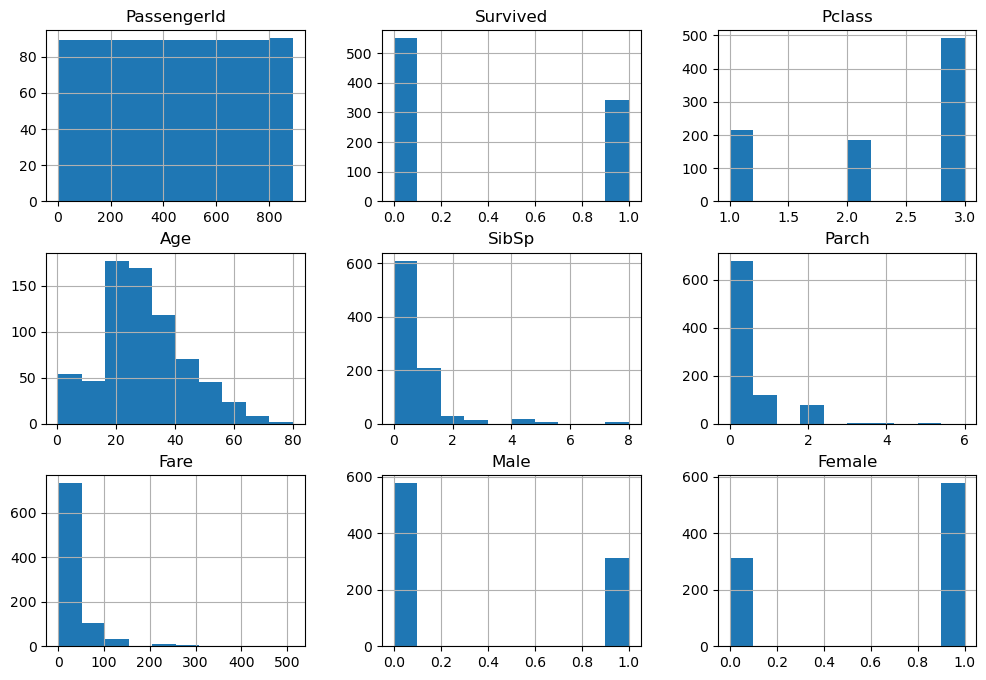

In [16]:
titanic.hist(layout=(3,3), figsize=(12,8))

Create pairplot to explore correlation with the existing data. color the points by those that survived.

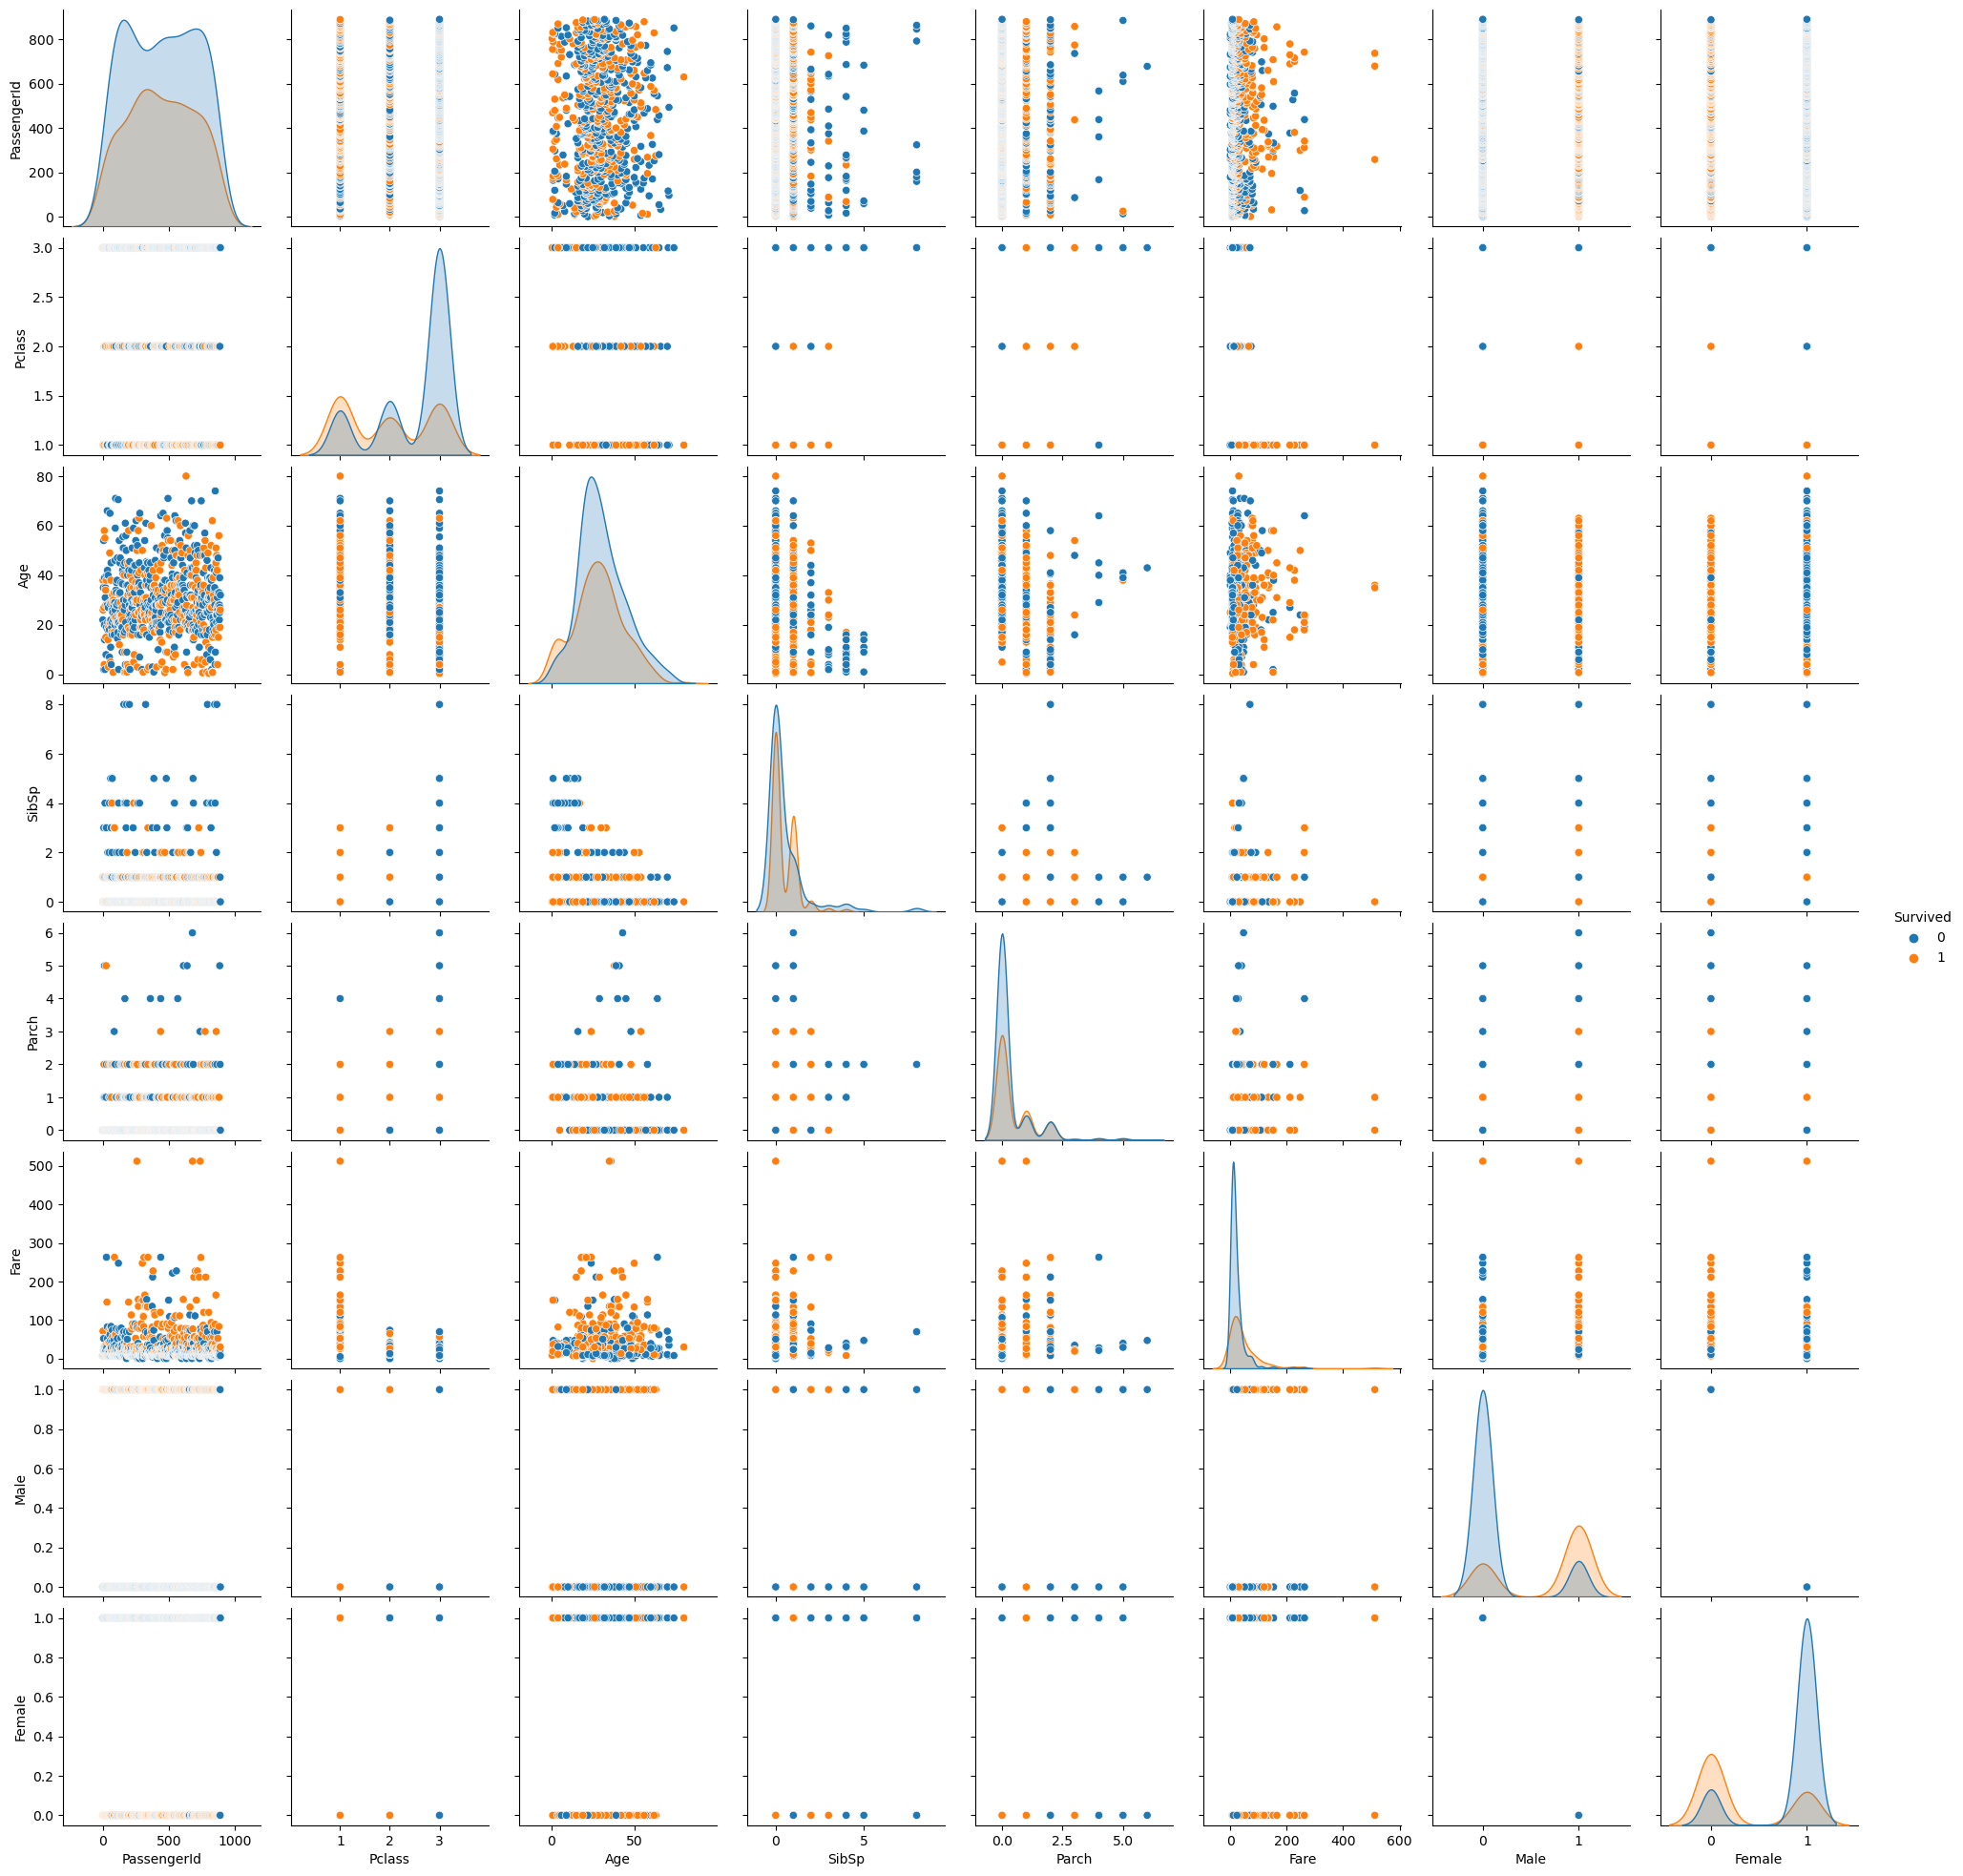

In [17]:
sns.pairplot(data=titanic, hue="Survived")

Generate a heatmap of the pair-wise correlation values for this dataset

<AxesSubplot:>

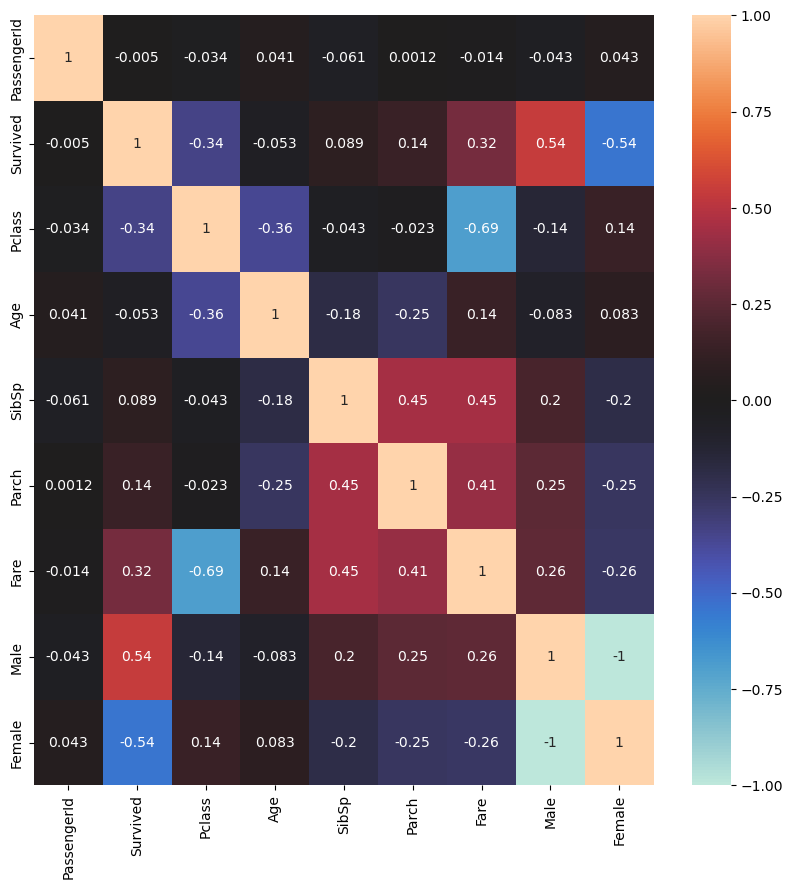

In [18]:
ticor = titanic.corr(method="spearman")
plt.figure(figsize=(10,10))
sns.heatmap(data=ticor, annot=True, center=0)

Aside from the convertion of `sex` to a one-hot encoding do we need to do any other cleaning prior to running our models?

Perform the cleaning:

In [28]:
ti2 = titanic.drop(["Cabin", "Ticket", "Name", "Embarked", "Sex", "Male"], axis=1)
ti2.head(10)

ti2.isna().sum()

ti2= ti2.drop(["Age"], axis=1)

ti2.isna().sum()

PassengerId    0
Survived       0
Pclass         0
SibSp          0
Parch          0
Fare           0
Female         0
dtype: int64

## Exercise 5: Use SML Classification Models 

First, separate out the outcome (dependent) variable and our observed (independent) data variables. Save these into variables named `X` and `Y`.

In [ ]:
x = ti2.drop("quality", axis=1).values

y = ti2["quality"].values

Normalize the observed data. Be sure to use the [normalization strategy](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing) best suited for the observations about the data.

Generate the training set such that 20% of the data is left for testing and 80% for training.   Name the variables with the training data as `Xt` and `Yt` respectively. Name the data used for testing/validation as `Xv` and `Yv`

Create a k-fold cross-validation strategy object to be used by the model that will be used to split the training data into 10 equal parts.

Use the following array to store results:
```python
results = {
    'SVC' : np.zeros(10),
    'RandomForestClassifier': np.zeros(10)
}
```

Let's use the `RandomForestClassifier` with this dataset

for comparision, let's use the SVC method with a linear kernal
```Python
alg = SVC(gamma='auto', kernel='linear')
```

Plot the results of each of the models. Which performed best?

Create a new object of the classifier that performed best:

Create a new model using all of the training data.

Using the testing data, predict the survivability.  Save the result in a new variable named `predictions`

Briefly, let's view the contents of the predictions array.

What is the overall accuracy of the predictions?

Create the confusion matrix and use the Seaborn [heatmap](https://seaborn.pydata.org/generated/seaborn.heatmap.html) function to explore how well the model worked. (Note, this may take awhile to create). For the heatmap, be sure to
+ Show the values of the confusion matrix in the cells of the heatmap
+ Set the x-axis and y-axis labels.

Finally, generate and print the classification report

How do you tell which variables were most helpful in performance of the model?  It depends on the algorithm used.  For the RandomForest model you will want to print the `feature_importances_` attribute of the algorithm object. Because we used a linear model for 'SVC' we can get the model coefficients with teh `coef_` attribute. For example:

For SVC
```python
feature_scores = alg.coef_
```

For RandomForest
```python
feature_scores = alg.feature_importances_
```

Try printing the appropriate attribute for the model you ran:

In the array returned, the scores are orderd in the same order that variables were provided to the model. The larger the coefficient or the importance score the more effect the variable has in prediction of outcome. 

What variables were most important for predicting survivability?